## **Report on the Analysis of OECD's and Non-OECD's Countries Fuel Demand**
### September 26, 2025

### **Loadind Data, Styles and Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_excel('Data.xlsx', sheet_name='Data')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nVariable descriptions:")
print(df.info())

Dataset shape: (106, 10)

First few rows:
     country  oecd code     area         gdppc       pop     fuelcon  \
0    Albania     0  ALB    27400   3700.738525   3204284   63.966255   
1    Algeria     0  DZA  2381741   4566.891113  35468208   75.920944   
2     Angola     0  AGO  1246700   4237.347656  19081912   34.472725   
3  Argentina     0  ARG  2736690   9124.334961  40412376   87.872360   
4  Australia     1  AUS  7682300  51628.597656  22065300  313.963562   

   fuelprice  oil_rents_gdp  pop_urban  
0   6.789734       1.357490   0.000000  
1   0.777977      23.375537   6.759854  
2   2.046335      39.719702  22.693997  
3   5.236047       2.334014  44.155553  
4   5.535066       0.772678  59.235835  

Variable descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        106 non-null    object 
 1   oecd         

### **PART 1. Fuel Demand in OECD Countries**

OECD countries: 33
Non-OECD countries: 73


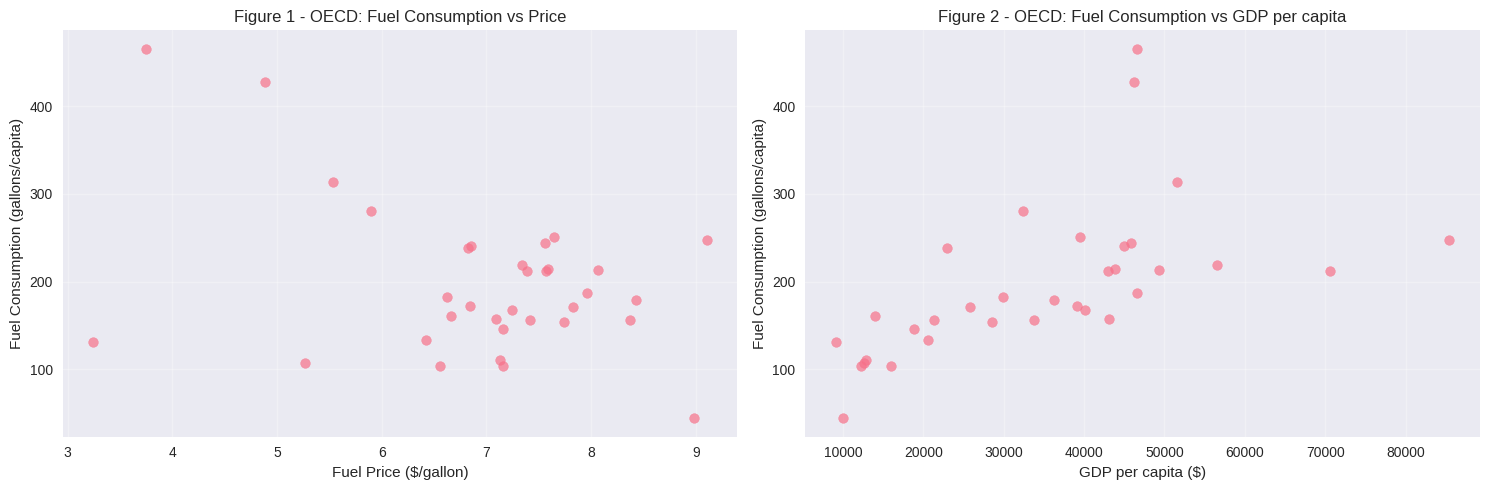

Table 1 - OECD COUNTRIES REGRESSION RESULTS

LINEAR SPECIFICATION:
                            OLS Regression Results                            
Dep. Variable:                fuelcon   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     27.38
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           1.71e-07
Time:                        15:18:08   Log-Likelihood:                -176.16
No. Observations:                  33   AIC:                             358.3
Df Residuals:                      30   BIC:                             362.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [5]:
# Filter OECD countries
oecd_df = df[df['oecd'] == 1].copy()
non_oecd_df = df[df['oecd'] == 0].copy()

print(f"OECD countries: {len(oecd_df)}")
print(f"Non-OECD countries: {len(non_oecd_df)}")

# Create scatter plots for OECD countries
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Fuel consumption vs Fuel price
axes[0].scatter(oecd_df['fuelprice'], oecd_df['fuelcon'], alpha=0.7)
axes[0].set_xlabel('Fuel Price ($/gallon)')
axes[0].set_ylabel('Fuel Consumption (gallons/capita)')
axes[0].set_title('Figure 1 - OECD: Fuel Consumption vs Price')
axes[0].grid(True, alpha=0.3)

# Plot 2: Fuel consumption vs GDP per capita
axes[1].scatter(oecd_df['gdppc'], oecd_df['fuelcon'], alpha=0.7)
axes[1].set_xlabel('GDP per capita ($)')
axes[1].set_ylabel('Fuel Consumption (gallons/capita)')
axes[1].set_title('Figure 2 - OECD: Fuel Consumption vs GDP per capita')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Regression analysis for OECD countries

# Linear specification
X_linear = oecd_df[['fuelprice', 'gdppc']]
X_linear = sm.add_constant(X_linear)  # Add constant term
y_linear = oecd_df['fuelcon']

model_linear = sm.OLS(y_linear, X_linear).fit()

# Log specification (adding small constant to avoid log(0))
small_constant = 1
X_log = np.log(oecd_df[['fuelprice', 'gdppc']] + small_constant)
X_log = sm.add_constant(X_log)
y_log = np.log(oecd_df['fuelcon'] + small_constant)

model_log = sm.OLS(y_log, X_log).fit()

# Display results
print("="*60)
print("Table 1 - OECD COUNTRIES REGRESSION RESULTS")
print("="*60)

print("\nLINEAR SPECIFICATION:")
print(model_linear.summary())

print("\n\nLOG-LOG SPECIFICATION:")
print(model_log.summary())

### **DISCUSSION OF PART 1**:
#### I began the analysis restricting the dataset to OECD countries (n = 33).
#### Then, I generated the two scatter plots to visualize the relationships:

*   The scatter plot in **Figure 1** shows a clear negative relationship. In OECD countries, as fuel price increases, fuel consumption per capita tends to decrease. This is consistent with basic economic theory, where higher prices lead to reduced quantity demanded.

*   The scatter plot in **Figure 2** reveals a positive relationship. OECD countries with higher GDP per capita tend to consume more fuel per person. This suggests that as income rises, demand for fuel (likely for transportation and other energy-intensive activities) also increases.

#### **Regression Analysis Results:** I estimated the two regression models for the OECD sample: a linear specification and a log-log (elasticity) specification, and the results are in **Table 1**.

**Linear Specification**: **fuelcon = β0 + β1 * fuelprice + β2 * gdppc + ε**

*   The coefficient for **fuelprice** is negative (**-37.94**) and statistically significant (**p < 0.001**), indicating that a one dolar increase in fuel price is associated with a decrease of approximately **37.94** gallons per capita in fuel consumption, holding GDP per capita constant. The coefficient for **gdppc** is positive (**0.0035**) and also highly significant (**p < 0.001**), meaning that a **$1,000** increase in GDP per capita is associated with an increase of about **3.5** gallons per capita in fuel consumption, holding fuel price constant.

*   The model explains **64.6%** of the variation in fuel consumption (**R-squared = 0.646**). The F-statistic is highly significant (**p = 1.71e-07**), confirming that the overall model is statistically valid.

*   These results are consistent with economic theory. The negative price coefficient aligns with the law of demand, and the positive income coefficient reflects fuel as a normal good.

**Log-Log Specification**: **ln(fuelcon) = β0 + β1 * ln(fuelprice) + β2 * ln(gdppc) + ε**

*   In this specification, the coefficients represent elasticities. Thus, the price elasticity of demand is **-1.18**. This means that a **1%** increase in fuel price leads to a **1.18%** decrease in fuel consumption, holding income constant. This value indicates that fuel demand is elastic (|elasticity| > 1) in OECD countries.

*   The income elasticity of demand is **0.65**. This means that a **1%** increase in GDP per capita leads to a **0.65%** increase in fuel consumption, holding price constant. This suggests fuel is a normal good, but not a luxury good (elasticity < 1).

*   The log-log model provides a better fit, explaining **79.4%** of the variation in the log of fuel consumption (**Adjusted R-squared = 0.780**). The F-statistic is also highly significant (**p = 5.11e-11**).

*   The magnitudes of the elasticities are plausible. A price elasticity greater than 1 in absolute value is reasonable for motor fuels in developed economies, where consumers have more substitutes (public transport, fuel-efficient vehicles) and can adjust their behavior over time. An income elasticity less than 1 is also expected for a necessity like fuel in high-income countries.


### **2. Fuel Demand for Non-OECD Countries**

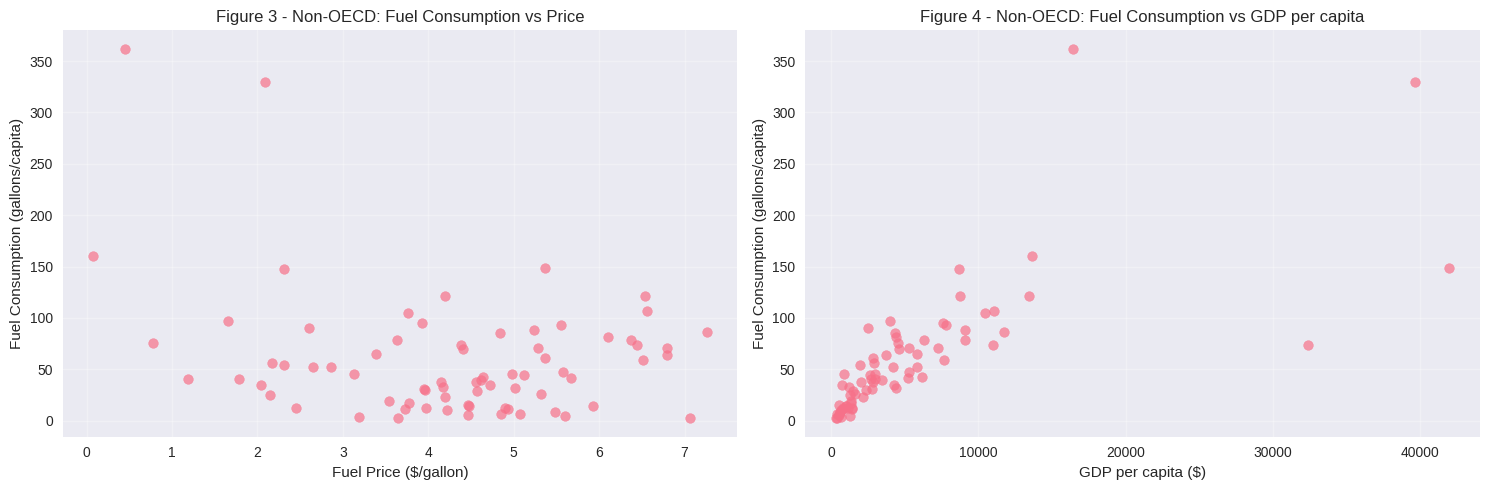

NON-OECD COUNTRIES REGRESSION RESULTS

LINEAR SPECIFICATION:
                            OLS Regression Results                            
Dep. Variable:                fuelcon   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     53.64
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           7.52e-15
Time:                        15:35:13   Log-Likelihood:                -369.70
No. Observations:                  73   AIC:                             745.4
Df Residuals:                      70   BIC:                             752.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [6]:
# Create scatter plots for non-OECD countries
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 3: Fuel consumption vs Fuel price
axes[0].scatter(non_oecd_df['fuelprice'], non_oecd_df['fuelcon'], alpha=0.7)
axes[0].set_xlabel('Fuel Price ($/gallon)')
axes[0].set_ylabel('Fuel Consumption (gallons/capita)')
axes[0].set_title('Figure 3 - Non-OECD: Fuel Consumption vs Price')
axes[0].grid(True, alpha=0.3)

# Plot 4: Fuel consumption vs GDP per capita
axes[1].scatter(non_oecd_df['gdppc'], non_oecd_df['fuelcon'], alpha=0.7)
axes[1].set_xlabel('GDP per capita ($)')
axes[1].set_ylabel('Fuel Consumption (gallons/capita)')
axes[1].set_title('Figure 4 - Non-OECD: Fuel Consumption vs GDP per capita')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Regression analysis for non-OECD countries
# Linear specification
X_linear_non = non_oecd_df[['fuelprice', 'gdppc']]
X_linear_non = sm.add_constant(X_linear_non)
y_linear_non = non_oecd_df['fuelcon']

model_linear_non = sm.OLS(y_linear_non, X_linear_non).fit()

# Log specification
X_log_non = np.log(non_oecd_df[['fuelprice', 'gdppc']] + small_constant)
X_log_non = sm.add_constant(X_log_non)
y_log_non = np.log(non_oecd_df['fuelcon'] + small_constant)

model_log_non = sm.OLS(y_log_non, X_log_non).fit()

print("="*60)
print("Table 2 - NON-OECD COUNTRIES REGRESSION RESULTS")
print("="*60)

print("\nLINEAR SPECIFICATION:")
print(model_linear_non.summary())

print("\n\nLOG-LOG SPECIFICATION:")
print(model_log_non.summary())

### **DISCUSSION OF PART 2**:
#### I continued the analysis restricting the dataset to Non-OECD countries (n = 73).
#### Then, I generated the two scatter plots to visualize the relationships:

*   The scatter plot in **Figure 3** shows a negative relationship, though it appears weaker and more dispersed than in OECD countries. Higher fuel prices are generally associated with lower per capita fuel consumption, but there is considerable variation, likely due to differences in subsidies, infrastructure, and economic development.

*   A strong positive relationship is evident from **Figure 4**. As GDP per capita rises, fuel consumption per capita also increases, often more steeply at lower income levels. This suggests that in developing economies, rising income significantly boosts access to vehicles and energy use.

#### **Regression Analysis Results**: I estimated both the linear and log-log regression models for non-OECD countries and they are shown in **Table 2**.

#### **Linear Specification: fuelcon = β₀ + β₁·fuelprice + β₂·gdppc + ε**

*   A one dolar increase in fuel price is associated with a **11.12-gallon** decrease in per capita fuel consumption, holding income constant. A **$1,000** increase in GDP per capita is associated with a **5.7-gallon** increase in fuel consumption.

*   The model explains **60.5%** of the variation in fuel consumption (**R² = 0.605**). The F-statistic is highly significant (**p < 0.001**).

*   The model shows signs of non-normality (**Jarque-Bera p ≈ 0**, high kurtosis and positive skew), suggesting the linear model may not fully capture the data structure, possibly due to heterogeneity across diverse non-OECD economies.

#### **Log-Log Specification: ln(fuelcon) = β₀ + β₁·ln(fuelprice) + β₂·ln(gdppc) + ε**

*   The price elasticity of **–0.39** indicates that a **1%** increase in fuel price leads to a **0.39%** decrease in fuel consumption. This indicates inelastic demand in non-OECD countries, where consumers are less responsive to price changes, possibly due to limited alternatives (e.g., poor public transport) or fuel subsidies.

*   The income elasticity of *0.77** suggests that a **1%** increase in GDP per capita raises fuel consumption by **0.77%**, confirming fuel as a normal good. The elasticity is slightly higher than in OECD countries (**0.65**), suggesting income plays a relatively larger role in driving fuel use in developing economies.

*   In terms of goodness of fit, the log-log model fits better, with **R² = 0.814** and well-behaved residuals (**Jarque-Bera p = 0.751, indicating normality**).

*   Regarding the consistencies with the expectations, I see that the lower price elasticity aligns with economic intuition for lower-income countries where fuel may be essential for basic mobility and less substitutable. The positive and substantial income elasticity reflects the strong link between development and motorization.

#### **Comparison with OECD Results**:

*   For context, even though not required in this part of the assignment, I think that it is worth noting that the price elasticity in non-OECD countries (**–0.39**) is much smaller in magnitude than in OECD countries (**–1.18**), which may confirm that consumers in wealthier nations are more sensitive to fuel prices, likely due to better access to alternatives and higher baseline consumption.

### **3. Additional Factors Analysis**

Countries available for comprehensive analysis: 106
COMPREHENSIVE REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:            log_fuelcon   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     156.7
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           1.13e-45
Time:                        14:47:19   Log-Likelihood:                -46.231
No. Observations:                 106   AIC:                             104.5
Df Residuals:                     100   BIC:                             120.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

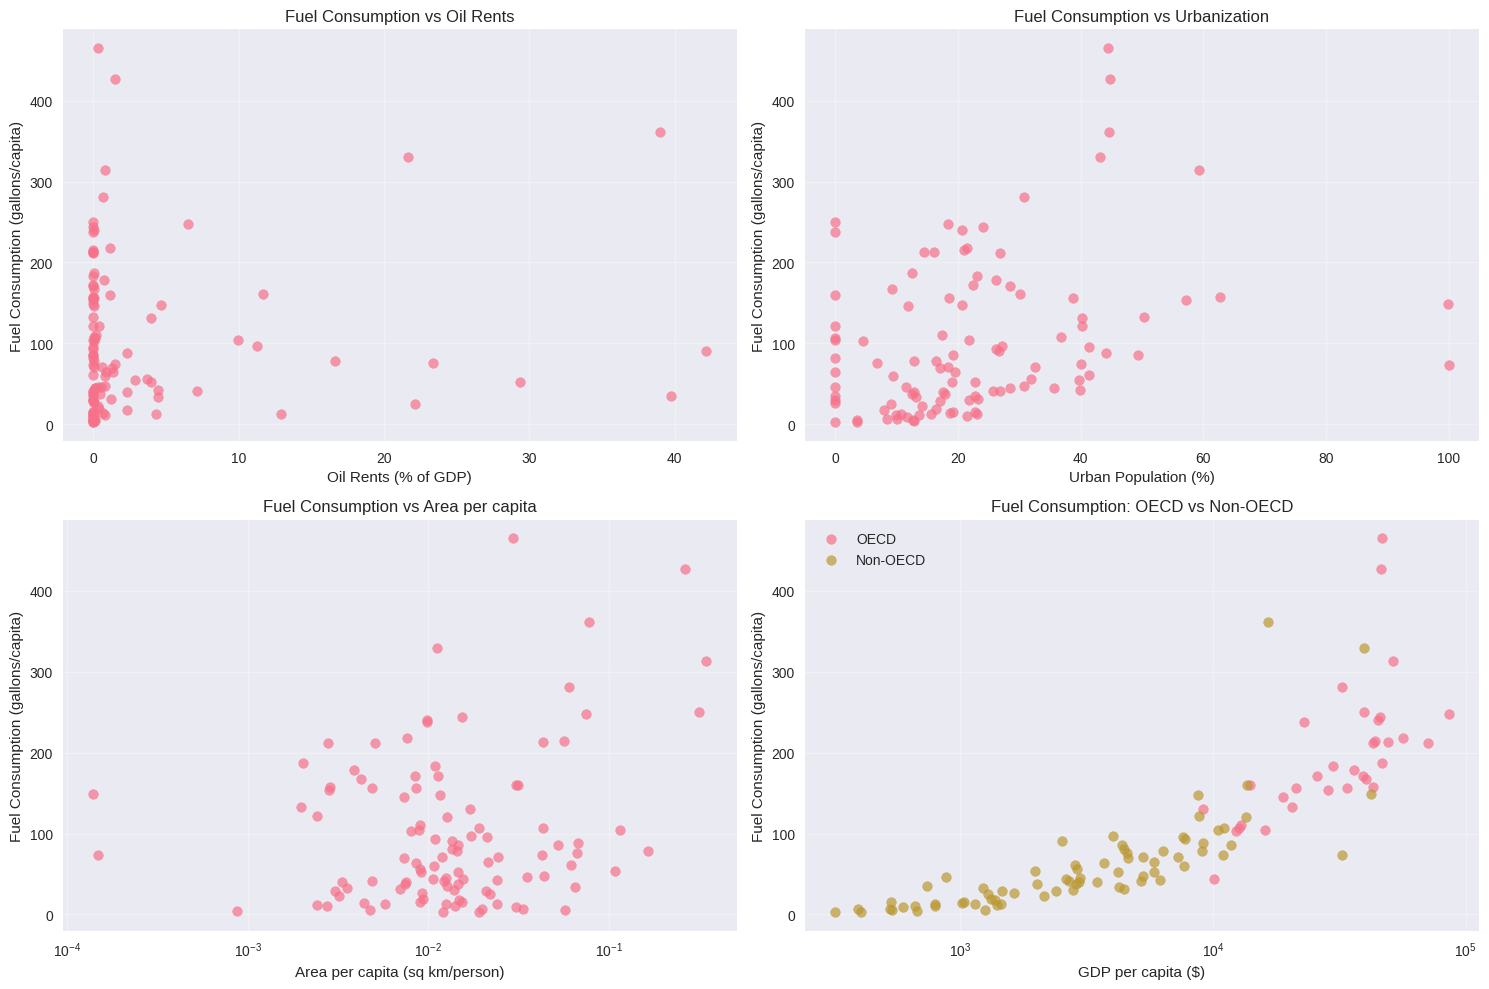

COEFFICIENT COMPARISON: OECD vs NON-OECD
  Variable  OECD_Coef  OECD_CI_Lower  OECD_CI_Upper  Non-OECD_Coef  \
0    const   0.876241      -0.532532       2.285013      -1.885366   

   Non-OECD_CI_Lower  Non-OECD_CI_Upper  Overlap  
0          -2.780672           -0.99006    False  


In [4]:
# Create new variables
df['area_per_capita'] = df['area'] / df['pop']
df['log_area_per_capita'] = np.log(df['area_per_capita'] + small_constant)

# Prepare data for comprehensive analysis
df_clean = df.dropna(subset=['fuelcon', 'fuelprice', 'gdppc', 'oil_rents_gdp', 'pop_urban', 'area_per_capita']).copy()

# Log transformations for comprehensive analysis
df_clean['log_fuelcon'] = np.log(df_clean['fuelcon'] + small_constant)
df_clean['log_fuelprice'] = np.log(df_clean['fuelprice'] + small_constant)
df_clean['log_gdppc'] = np.log(df_clean['gdppc'] + small_constant)
df_clean['log_oil_rents'] = np.log(df_clean['oil_rents_gdp'] + small_constant)

print(f"Countries available for comprehensive analysis: {len(df_clean)}")

# Comprehensive regression including skeptic's factors
formula = 'log_fuelcon ~ log_fuelprice + log_gdppc + oil_rents_gdp + pop_urban + log_area_per_capita'
model_comprehensive = smf.ols(formula, data=df_clean).fit()

print("COMPREHENSIVE REGRESSION RESULTS")
print("="*50)
print(model_comprehensive.summary())

# Separate analyses for OECD and non-OECD
formula_oecd = 'log_fuelcon ~ log_fuelprice + log_gdppc + oil_rents_gdp + pop_urban + log_area_per_capita'
model_oecd_comp = smf.ols(formula_oecd, data=df_clean[df_clean['oecd'] == 1]).fit()

model_non_oecd_comp = smf.ols(formula_oecd, data=df_clean[df_clean['oecd'] == 0]).fit()

print("Table 3 - OECD COMPREHENSIVE REGRESSION:")
print(model_oecd_comp.summary())

print("\n\n Table 4 - NON-OECD COMPREHENSIVE REGRESSION:")
print(model_non_oecd_comp.summary())

# Create visualizations for additional factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Oil rents vs fuel consumption
axes[0,0].scatter(df_clean['oil_rents_gdp'], df_clean['fuelcon'], alpha=0.7)
axes[0,0].set_xlabel('Oil Rents (% of GDP)')
axes[0,0].set_ylabel('Fuel Consumption (gallons/capita)')
axes[0,0].set_title('Figure 5 - Fuel Consumption vs Oil Rents')
axes[0,0].grid(True, alpha=0.3)

# Urban population vs fuel consumption
axes[0,1].scatter(df_clean['pop_urban'], df_clean['fuelcon'], alpha=0.7)
axes[0,1].set_xlabel('Urban Population (%)')
axes[0,1].set_ylabel('Fuel Consumption (gallons/capita)')
axes[0,1].set_title('Figure 6 - Fuel Consumption vs Urbanization')
axes[0,1].grid(True, alpha=0.3)

# Area per capita vs fuel consumption
axes[1,0].scatter(df_clean['area_per_capita'], df_clean['fuelcon'], alpha=0.7)
axes[1,0].set_xlabel('Area per capita (sq km/person)')
axes[1,0].set_ylabel('Fuel Consumption (gallons/capita)')
axes[1,0].set_title('Figure 7 - Fuel Consumption vs Area per capita')
axes[1,0].set_xscale('log')
axes[1,0].grid(True, alpha=0.3)

# OECD vs non-OECD comparison
for i, (label, data) in enumerate([('OECD', oecd_df), ('Non-OECD', non_oecd_df)]):
    axes[1,1].scatter(data['gdppc'], data['fuelcon'], alpha=0.7, label=label)
axes[1,1].set_xlabel('GDP per capita ($)')
axes[1,1].set_ylabel('Fuel Consumption (gallons/capita)')
axes[1,1].set_title('Comparison of Fuel Consumption: OECD vs Non-OECD')
axes[1,1].legend()
axes[1,1].set_xscale('log')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confidence interval comparison function
def compare_coefficients(model1, model2, var_names, model1_name="Model 1", model2_name="Model 2"):
    """Compare coefficients and confidence intervals between two models"""
    comparison = []
    for var in var_names:
        if var in model1.params.index and var in model2.params.index:
            coef1 = model1.params[var]
            ci1 = model1.conf_int().loc[var]
            coef2 = model2.params[var]
            ci2 = model2.conf_int().loc[var]

            comparison.append({
                'Variable': var,
                f'{model1_name}_Coef': coef1,
                f'{model1_name}_CI_Lower': ci1[0],
                f'{model1_name}_CI_Upper': ci1[1],
                f'{model2_name}_Coef': coef2,
                f'{model2_name}_CI_Lower': ci2[0],
                f'{model2_name}_CI_Upper': ci2[1],
                'Overlap': (ci1[0] <= ci2[1]) and (ci2[0] <= ci1[1])
            })

    return pd.DataFrame(comparison)

# Compare OECD vs non-OECD coefficients
var_comparison = compare_coefficients(model_log, model_log_non,
                                     ['const', 'log_fuelprice', 'log_gdppc'],
                                     "OECD", "Non-OECD")
print("COEFFICIENT COMPARISON: OECD vs NON-OECD")
print("="*50)
print(var_comparison)

### **DISCUSSION OF PART 3**:
#### **A. Examining the additional factors that I think may influence fuel demand:**

*   Oil rents (% of GDP)
*   Urban population (% of total population)
*   Area per capita (as a proxy for population density or geographic dispersion)

#### My analysis, therefore, included a regression model using the full sample (106 countries), as well as separate models for OECD and non-OECD countries, all in log-log form (with some variables in levels). I generated three scatter plots for each of the factors to explore potential relationships:

*   Regarding the fuel consumption vs. oil rents (% of GDP), I see no clear linear pattern. High oil rents (e.g., in oil-exporting nations) do not consistently correspond to higher or lower fuel consumption, suggesting that oil wealth may not directly translate into domestic fuel use, possibly due to pricing policies or subsidies.

*   Regarding the fuel consumption vs. urban population (%), I noticed that a moderate positive relationship appears, especially among non-OECD countries. Urbanization may increase fuel demand due to congestion, commuting, and economic activity, though in some high-income cities, public transport may offset this effect.

*   Finally, regarding fuel consumption vs. area per capita (log scale), a positive association is visible, where countries with more land per person (e.g., Canada, Australia, Kazakhstan) tend to have higher fuel consumption, likely due to longer travel distances and car dependency.

#### **B. A log-log regression model was estimated using all 106 countries and the proposed model was**:

#### **ln(fuelcon) = β₀ + β₁·ln(fuelprice) + β₂·ln(gdppc) + β₃·oil_rents_gdp + β₄·pop_urban + β₅·ln(area_per_capita) + ε**

* In terms of goodness of fit, the model explains **88.7%** of the variation in log fuel consumption (**R² = 0.887**), a substantial improvement over the basic two-variable model.

* Despite theoretical relevance, oil rents and area per capita are not statistically significant in the full sample. Urbanization is marginally significant (**p = 0.068**) with a negative sign, which is contrary to initial visual impression.

#### **C. Separate Analyses: OECD vs. Non-OECD: To assess heterogeneity, I ran the model separately for each group and my interpretations were as follows:**

* **Regarding OECD Countries:**

  - **ln(fuelprice)** coefficient: **–1.262** (**p < 0.001**) (highly elastic demand).

  - **pop_urban** is negative and significant (**p = 0.044**): in developed countries, more urbanization is associated with lower per capita fuel consumption, likely due to efficient public transport and compact cities.

  - **oil_rents_gdp** and **ln(area_per_capita)** remain insignificant.

* **Regarding Non-OECD Countries:**

  - **ln(fuelprice)** coefficient: **–0.364** (**p = 0.033**) (inelastic demand, consistent with what I observed from Part 2).

  - **pop_urban** is negative and significant (**p = 0.031**): even in developing countries, urbanization correlates with lower per capita fuel use, possibly because rural populations rely on fuel for generators, agriculture, or lack alternatives.

  - **oil_rents_gdp** is positive but insignificant (**p = 0.873**), suggesting oil wealth does not systematically increase domestic fuel consumption (perhaps due to export orientation or subsidies that don’t raise consumption).

  - **ln(area_per_capita)** is insignificant (**p = 0.771**), with a very large standard error.

#### **D. Do the “Skeptic’s Factors” Matter?**

* I believe this likely refers to potential omitted variables that a skeptic might argue drive fuel demand more than price or income (e.g., geography, oil wealth, urban structure).

  - **Oil rents**: Not significant in any specification. This suggests that being an oil-rich country does not lead to systematically higher domestic fuel consumption, i.e., policy (e.g., subsidies or taxes) likely mediates this relationship.

  - **Urbanization**: Consistently negative and significant in both subgroups. This challenges the naive view that cities increase fuel use; instead, they appear to reduce per capita consumption, supporting the role of density and public transit.

  - **Area per capita**: While intuitively plausible, it lacks statistical significance, possibly because its effect is already captured by income and urbanization, or because the measure is noisy.

#### **E. Conclusions for Part 3:**

* What I can conclude from this is that the inclusion of additional factors improves model fit but does not overturn the core findings from Parts 1 and 2. That is, price and income remain the dominant and statistically robust determinants of fuel demand, as well as urbanization has a significant negative effect, reinforcing that city design influences consumption.

* Also, oil rents and country size (area per capita) do not emerge as key drivers in this dataset.

* Therefore, I think that my original original conclusions about price and income elasticities are robust to the inclusion of these additional variables.